<a href="https://colab.research.google.com/github/abiraaaaaaf/ML-DL-Python-Introduction/blob/main/Session_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

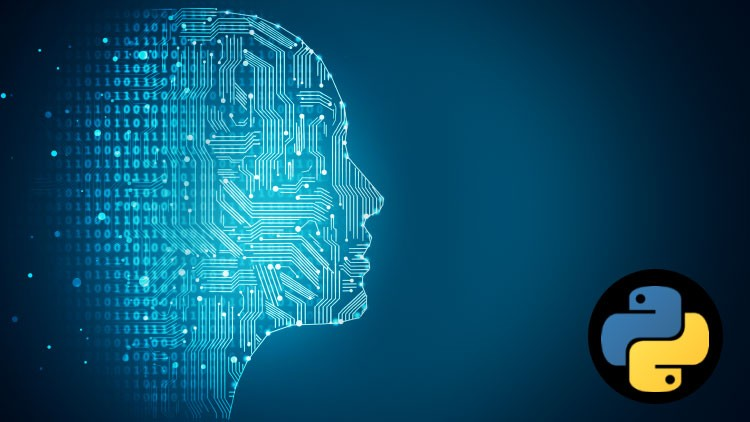

### Training a simple Convolutional Neural Network (CNN) to classify CIFAR images

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Download and prepare the CIFAR10 dataset

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170508288/170498071 [==============================] - 3s 0us/step


Verify the data

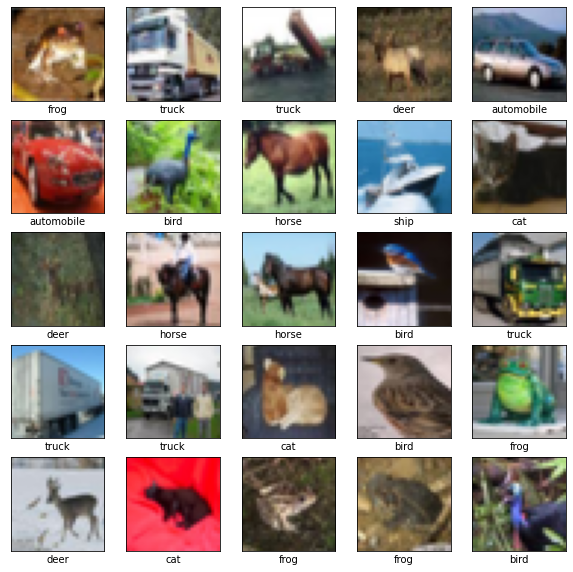

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

A stack of Conv2D and MaxPooling2D layers to define the convolutional base

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Let's display the architecture of your model so far:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
)

Add Dense layers on top:

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))  # Fully Connected
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="model2.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
)

Compile and train the model:

https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.5414 - accuracy: 0.4359 - val_loss: 1.2721 - val_accuracy: 0.5448
Epoch 2/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.1933 - accuracy: 0.5772 - val_loss: 1.1712 - val_accuracy: 0.5819
Epoch 3/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.0535 - accuracy: 0.6291 - val_loss: 1.0145 - val_accuracy: 0.6429
Epoch 4/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.9591 - accuracy: 0.6628 - val_loss: 0.9640 - val_accuracy: 0.6626
Epoch 5/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8891 - accuracy: 0.6876 - val_loss: 1.0257 - val_accuracy: 0.6518
Epoch 6/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8369 - accuracy: 0.7061 - val_loss: 0.9412 - val_accuracy: 0.6714
Epoch 7/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7875 - accuracy: 0.7250 - val_loss: 0.9111 -

Evaluate the model:

313/313 - 4s - loss: 0.9226 - accuracy: 0.6883 - 4s/epoch - 11ms/step


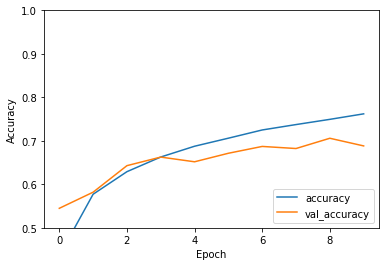

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

0.6883000135421753


### Word Embedding

[1,0,0,0,0]

[0,1,0,0,0]

[0,0,1,0,0]

...

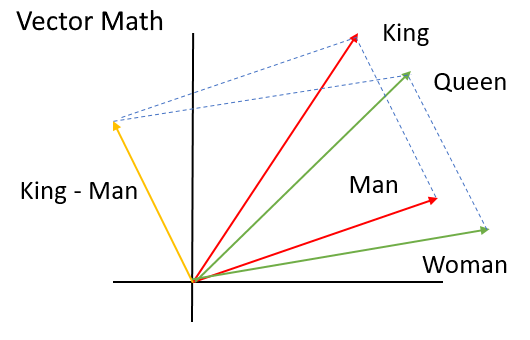

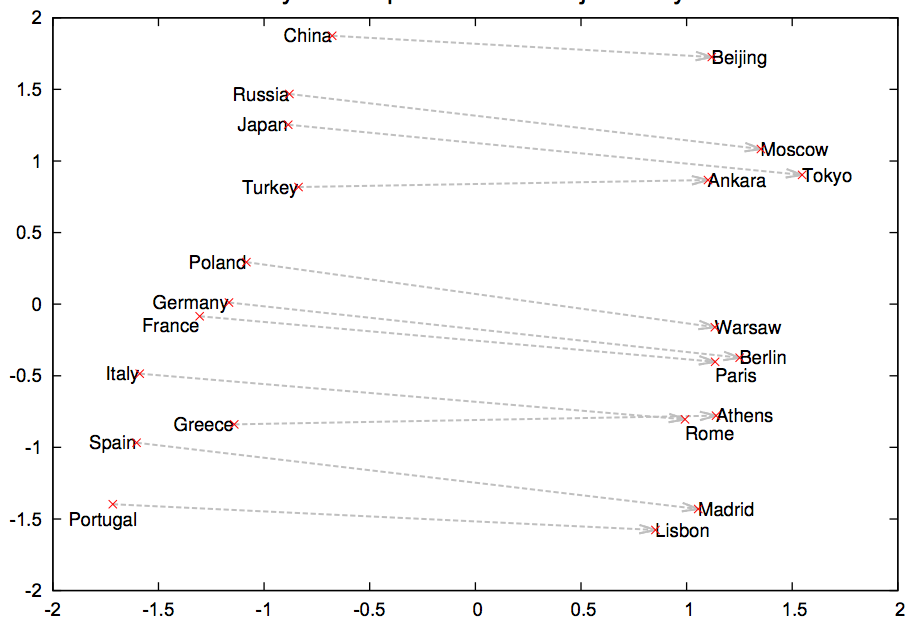

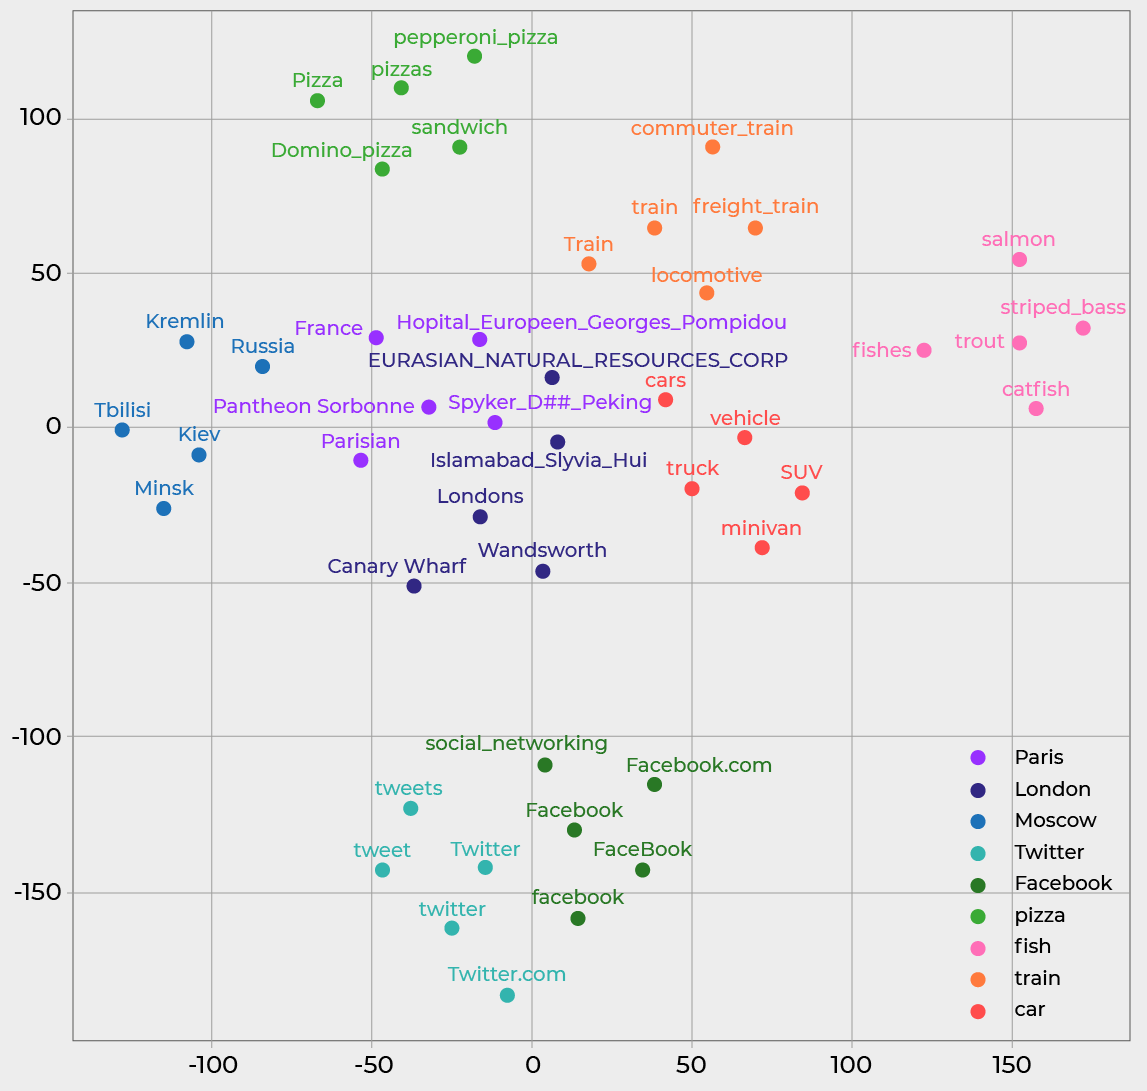

### Gensim Library (word2vec/GloVe)

In [ ]:
!wget -P . -c "http://nlp.stanford.edu/data/glove.840B.300d.zip"

--2022-04-27 10:01:18--  http://nlp.stanford.edu/data/glove.840B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.840B.300d.zip [following]
--2022-04-27 10:01:18--  https://nlp.stanford.edu/data/glove.840B.300d.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.840B.300d.zip [following]
--2022-04-27 10:01:18--  http://downloads.cs.stanford.edu/nlp/data/glove.840B.300d.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2176768927 (2.0G) [application/zip

[0.1, 0.3, 0.03, ... , 0.003] = Frog

[0.09, 0.2, ... ] = Fish


In [ ]:
!unzip glove.840B.300d.zip

Archive:  glove.840B.300d.zip
  inflating: glove.840B.300d.txt     


In [ ]:
#GloVe2word2vec
import numpy as np

# Get the interactive Tools for Matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [ ]:
glove_input_file = 'glove.840B.300d.txt'   
word2vec_output_file = 'glove.840B.300d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

(2196017, 300)

In [ ]:
# load the Stanford GloVe model
filename = 'glove.840B.300d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)

In [ ]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [ ]:
# japanese + australia - japan = australian
analogy('japan', 'japanese', 'australia')

'australian'

In [ ]:
# fantastic + bad - good = awful
analogy('good', 'fantastic', 'bad')

'awful'

In [ ]:
# Define a list of words
list_words_ = ['australia', 'green', 'japan', 'italy', 'sky', 'blue', 'sun', 'night', 'day', 'red']

In [ ]:
# Plot a list of words with PCA

import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(12,12))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='g')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)
    plt.show()

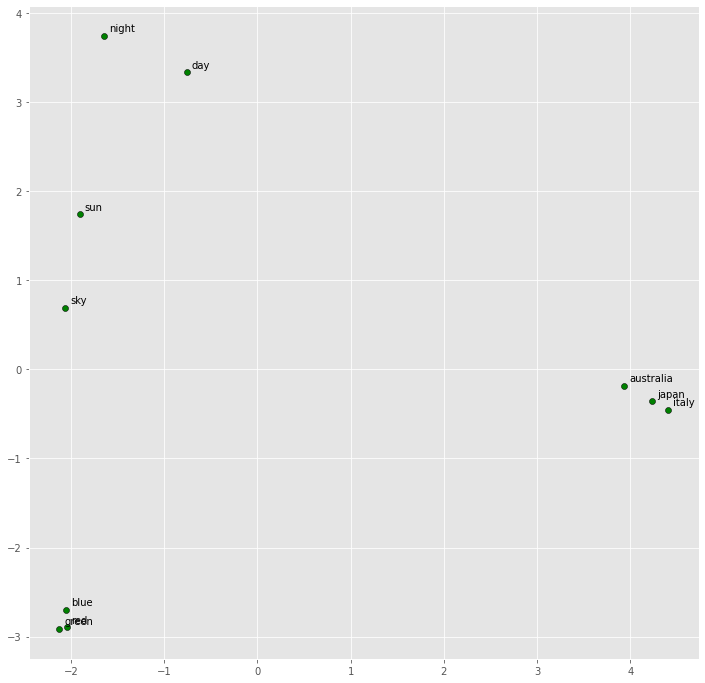

In [ ]:
display_pca_scatterplot(model, list_words_)

### Introduction to matplotlib:

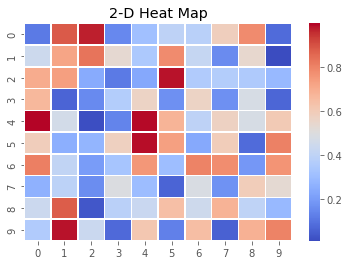

In [ ]:
# 2-D Heat map
# using seaborn.heatmap() method
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
  
data_set = np.random.rand( 10 , 10 )
ax = sns.heatmap( data_set , linewidth = 0.5 , cmap = 'coolwarm' )
  
plt.title( "2-D Heat Map" )
plt.show()

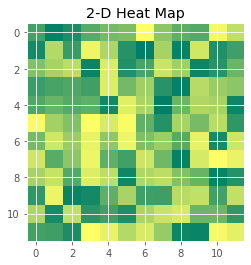

In [60]:
# 2-D Heat map
# using matplotlib.pyplot.imshow() method

import numpy as np
import matplotlib.pyplot as plt
  
data = np.random.random(( 12 , 12 ))
plt.imshow( data , cmap = 'summer' , interpolation = 'nearest' )
  
plt.title( "2-D Heat Map" )
plt.show()

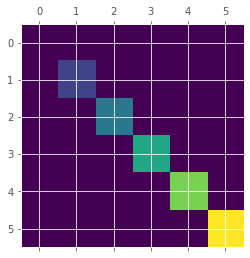

In [ ]:
a = np.diag(range(6))   # 0, 1, 2, 3, 4, 5
plt.matshow(a)

In [ ]:
import pandas as pd
india_china_df = pd.DataFrame({'India':[8880, 8670, 8147, 7338, 5704], 
                    'China':[5123, 6682, 3308, 1863, 1527]},
                 index=[1980, 1981, 1982, 1983, 1984])

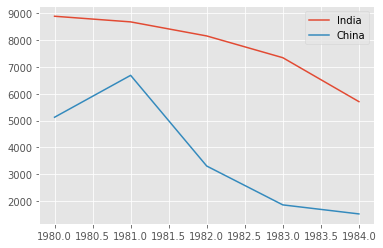

In [ ]:
india_china_df.plot(kind="line")

In [ ]:
import pandas as pd
df_canada = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

In [ ]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_canada.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_canada.set_index('OdName', inplace = True)
df_canada.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)

In [ ]:
# Change years to be integers instead of strings
years = list(range(1980, 2014))
df_canada['Total'] = df_canada[years].sum(axis=1)

In [ ]:
df_canada.sort_values(by='Total', ascending = False, axis=0, inplace=True)

In [ ]:
df_top5 = df_canada.head()
df_top5

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
OdName,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [ ]:
df_top5 = df_top5[years].transpose()
df_top5

OdName,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668
1985,4211,1816,9564,3150,514
1986,7150,1960,9470,4166,691
1987,10189,2643,21337,7360,1072
1988,11522,2758,27359,8639,1334
1989,10343,4323,23795,11865,2261


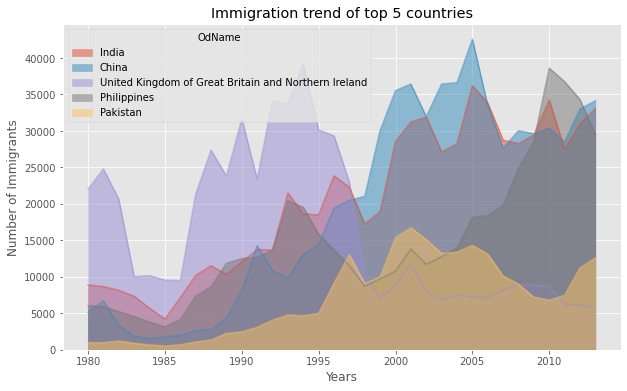

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

df_top5.plot(kind='area', figsize=(10, 6), stacked=False)

plt.title('Immigration trend of top 5 countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

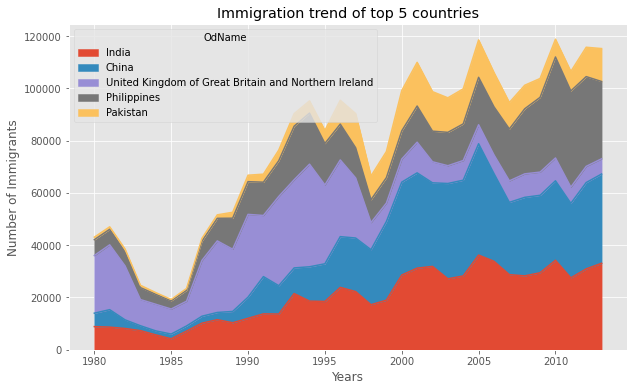

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

df_top5.plot(kind='area', figsize=(10, 6), stacked=True)

plt.title('Immigration trend of top 5 countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

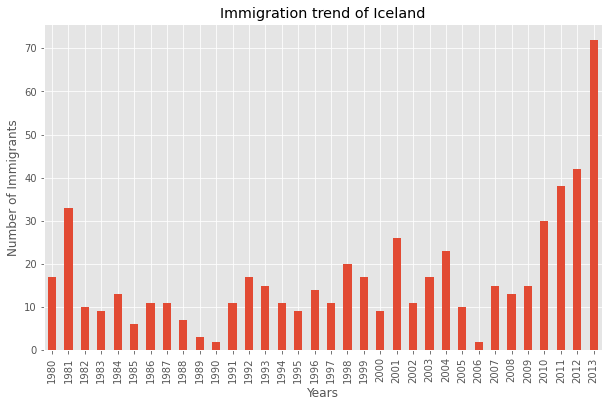

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

df_iceland = df_canada.loc['Iceland', years]
df_iceland.plot(kind='bar', figsize=(10, 6))

plt.title('Immigration trend of Iceland')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

In [ ]:
years = list(range(1980, 2014))
df_canada['Total'] = df_canada[years].sum(axis=1)
df_continents = df_canada.groupby('Continent', axis = 0).sum()

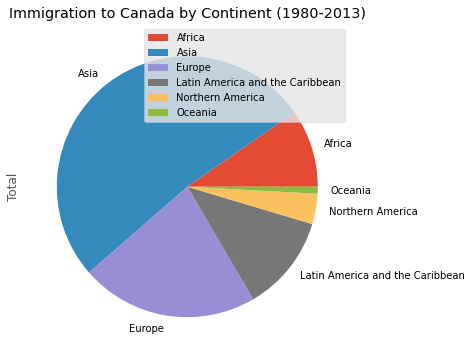

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

df_continents['Total'].plot(kind='pie', figsize=(10,6))
plt.title("Immigration to Canada by Continent (1980-2013)")
plt.legend()
plt.show()

Text(0, 0.5, 'Number of Immigrants')

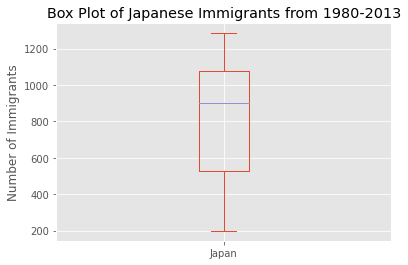

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

df_japan = df_canada.loc['Japan', years].transpose()
df_japan.plot(kind='box')
plt.title("Box Plot of Japanese Immigrants from 1980-2013")
plt.ylabel("Number of Immigrants")

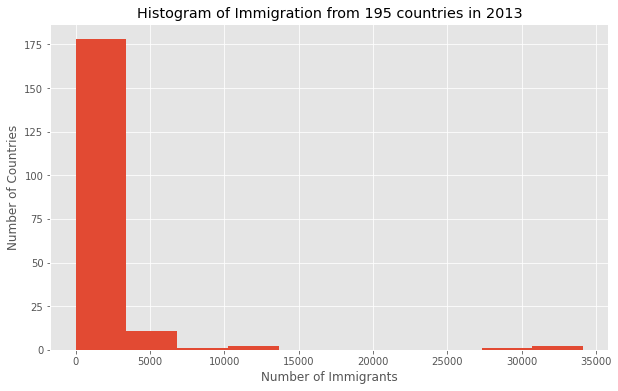

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

df_canada[2013].plot(kind='hist', figsize=(10, 6))

plt.title('Histogram of Immigration from 195 countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')

plt.show()

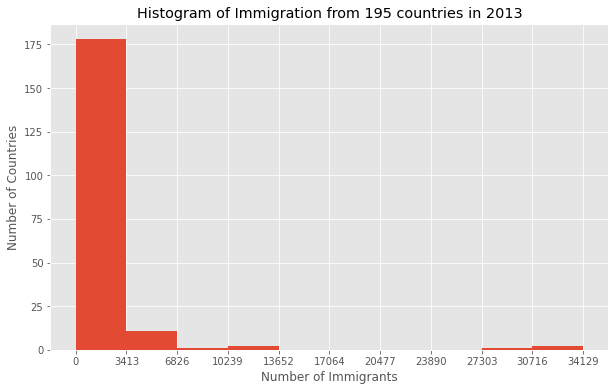

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

count, bin_edges = np.histogram(df_canada[2013])
df_canada[2013].plot(kind='hist', xticks=bin_edges, figsize=(10, 6))

plt.title('Histogram of Immigration from 195 countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')

plt.show()